Created by @mterrestre01

The following code is an example of data visualisation using the Wikipedia API.
My starting point is the following question: does Hollywood tend to reward young actresses more than older ones? 
For this I set out to analyze the distribution of Oscars winners for best actress and compared to the similar peer set, winners for best actor.
Then I created age ranges of 10 years each and then visualize all age groups by gender, using a butterfly chart.

In [26]:
#Imports all necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import wikipedia as wp
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

In [63]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [64]:
# scraps Wikipedia page that contains table with male oscar winners
wikiurl="https://en.wikipedia.org/wiki/List_of_Academy_Award_for_Best_Actor_winners_by_age"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [65]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
maletable=soup.find('table',{'class':"wikitable"})

In [66]:
# creates Pandas dataframe for male table
df_male=pd.read_html(str(maletable))
# convert list to dataframe
df_male=pd.DataFrame(df_male[0])
df_male.style
#print(df_male.tail())


,#,Actor,Film,Date of birth,Date of award,Age upon receiving award,Date of death,Lifespan,Notes,Unnamed: 9
0,1,Emil Jannings,"The Last Command,The Way of All Flesh",nan,"May 16, 1929","44 years, 297 days",nan,"23,903 days (65 years, 163 days)","Held record as oldest winner for 2 award ceremonies (from the 1st to the 3rd, May 1929–November 1930 [1 year, 6 months])",nan
1,2,Warner Baxter,In Old Arizona,nan,"April 3, 1930","41 years, 5 days",nan,"22,683 days (62 years, 39 days)","Held record as youngest winner for 3 award ceremonies (from the 2nd to the 5th, April 1930–November 1932 [2 years, 7 months])",nan
2,3,George Arliss,Disraeli,nan,"November 5, 1930","62 years, 209 days",nan,"28,424 days (77 years, 301 days)","Held record as oldest winner for 39 award ceremonies (from the 3rd to the 42nd, November 1930–April 1970 [39 years, 5 months])",nan
3,4,Lionel Barrymore,A Free Soul,nan,"November 10, 1931","53 years, 196 days",nan,"27,959 days (76 years, 201 days)",nan,nan
4,5,Wallace Beery,The Champ,nan,"November 18, 1932","47 years, 231 days",nan,"23,389 days (64 years, 14 days)",Tie,nan
5,6,Fredric March,Dr. Jekyll and Mr. Hyde,nan,"November 18, 1932","35 years, 79 days",nan,"28,349 days (77 years, 226 days)","Tie; 1st of 2Held record as youngest winner for 1 award ceremony (from the 5th to the 6th, November 1932–March 1934 [1 year, 4 months])",nan
6,7,Charles Laughton,The Private Life of Henry VIII,nan,"March 16, 1934","34 years, 258 days",nan,"23,177 days (63 years, 167 days)","Held record as youngest winner for 1 award ceremony (from the 6th to the 7th, March 1934–February 1935)",nan
7,8,Clark Gable,It Happened One Night,nan,"February 27, 1935","34 years, 26 days",nan,"21,838 days (59 years, 289 days)","Held record as youngest winner for 6 award ceremonies (from the 7th to the 13th, February 1935–February 1941)",nan
8,9,Victor McLaglen,The Informer,nan,"March 5, 1936","49 years, 86 days",nan,"26,629 days (72 years, 332 days)",nan,nan
9,10,Paul Muni,The Story of Louis Pasteur,nan,"March 4, 1937","41 years, 163 days",nan,"26,269 days (71 years, 337 days)",nan,nan


In [67]:
#Drops last row since it's not actual data
df_male = df_male.iloc[:-1]
df_male.style
#print(df_male)


,#,Actor,Film,Date of birth,Date of award,Age upon receiving award,Date of death,Lifespan,Notes,Unnamed: 9
0,1,Emil Jannings,"The Last Command,The Way of All Flesh",nan,"May 16, 1929","44 years, 297 days",nan,"23,903 days (65 years, 163 days)","Held record as oldest winner for 2 award ceremonies (from the 1st to the 3rd, May 1929–November 1930 [1 year, 6 months])",nan
1,2,Warner Baxter,In Old Arizona,nan,"April 3, 1930","41 years, 5 days",nan,"22,683 days (62 years, 39 days)","Held record as youngest winner for 3 award ceremonies (from the 2nd to the 5th, April 1930–November 1932 [2 years, 7 months])",nan
2,3,George Arliss,Disraeli,nan,"November 5, 1930","62 years, 209 days",nan,"28,424 days (77 years, 301 days)","Held record as oldest winner for 39 award ceremonies (from the 3rd to the 42nd, November 1930–April 1970 [39 years, 5 months])",nan
3,4,Lionel Barrymore,A Free Soul,nan,"November 10, 1931","53 years, 196 days",nan,"27,959 days (76 years, 201 days)",nan,nan
4,5,Wallace Beery,The Champ,nan,"November 18, 1932","47 years, 231 days",nan,"23,389 days (64 years, 14 days)",Tie,nan
5,6,Fredric March,Dr. Jekyll and Mr. Hyde,nan,"November 18, 1932","35 years, 79 days",nan,"28,349 days (77 years, 226 days)","Tie; 1st of 2Held record as youngest winner for 1 award ceremony (from the 5th to the 6th, November 1932–March 1934 [1 year, 4 months])",nan
6,7,Charles Laughton,The Private Life of Henry VIII,nan,"March 16, 1934","34 years, 258 days",nan,"23,177 days (63 years, 167 days)","Held record as youngest winner for 1 award ceremony (from the 6th to the 7th, March 1934–February 1935)",nan
7,8,Clark Gable,It Happened One Night,nan,"February 27, 1935","34 years, 26 days",nan,"21,838 days (59 years, 289 days)","Held record as youngest winner for 6 award ceremonies (from the 7th to the 13th, February 1935–February 1941)",nan
8,9,Victor McLaglen,The Informer,nan,"March 5, 1936","49 years, 86 days",nan,"26,629 days (72 years, 332 days)",nan,nan
9,10,Paul Muni,The Story of Louis Pasteur,nan,"March 4, 1937","41 years, 163 days",nan,"26,269 days (71 years, 337 days)",nan,nan


In [68]:
# Converts objects to Python 'usable' data types
df_male = df_male.convert_dtypes()
print(df_male.dtypes)

#                           string
Actor                       string
Film                        string
Date of birth                Int64
Date of award               string
Age upon receiving award    string
Date of death                Int64
Lifespan                    string
Notes                       string
Unnamed: 9                   Int64
dtype: object


In [69]:
#Add a categorical variable for gender and populate with value 1, so that male = 1 and female = 0
df_male['Gender'] = 'Male'
df_male['Gender'] = df_male['Gender'].astype("category")
print(df_male.dtypes)

#                             string
Actor                         string
Film                          string
Date of birth                  Int64
Date of award                 string
Age upon receiving award      string
Date of death                  Int64
Lifespan                      string
Notes                         string
Unnamed: 9                     Int64
Gender                      category
dtype: object


In [70]:
# Obtains age from column 'Age upon receiving award' by trimming first 2 characters 
#and stores in new column Age
df_male['Age'] = df_male['Age upon receiving award'].str[:2]
df_male.style

,#,Actor,Film,Date of birth,Date of award,Age upon receiving award,Date of death,Lifespan,Notes,Unnamed: 9,Gender,Age
0,1,Emil Jannings,"The Last Command,The Way of All Flesh",,"May 16, 1929","44 years, 297 days",,"23,903 days (65 years, 163 days)","Held record as oldest winner for 2 award ceremonies (from the 1st to the 3rd, May 1929–November 1930 [1 year, 6 months])",,Male,44
1,2,Warner Baxter,In Old Arizona,,"April 3, 1930","41 years, 5 days",,"22,683 days (62 years, 39 days)","Held record as youngest winner for 3 award ceremonies (from the 2nd to the 5th, April 1930–November 1932 [2 years, 7 months])",,Male,41
2,3,George Arliss,Disraeli,,"November 5, 1930","62 years, 209 days",,"28,424 days (77 years, 301 days)","Held record as oldest winner for 39 award ceremonies (from the 3rd to the 42nd, November 1930–April 1970 [39 years, 5 months])",,Male,62
3,4,Lionel Barrymore,A Free Soul,,"November 10, 1931","53 years, 196 days",,"27,959 days (76 years, 201 days)",,,Male,53
4,5,Wallace Beery,The Champ,,"November 18, 1932","47 years, 231 days",,"23,389 days (64 years, 14 days)",Tie,,Male,47
5,6,Fredric March,Dr. Jekyll and Mr. Hyde,,"November 18, 1932","35 years, 79 days",,"28,349 days (77 years, 226 days)","Tie; 1st of 2Held record as youngest winner for 1 award ceremony (from the 5th to the 6th, November 1932–March 1934 [1 year, 4 months])",,Male,35
6,7,Charles Laughton,The Private Life of Henry VIII,,"March 16, 1934","34 years, 258 days",,"23,177 days (63 years, 167 days)","Held record as youngest winner for 1 award ceremony (from the 6th to the 7th, March 1934–February 1935)",,Male,34
7,8,Clark Gable,It Happened One Night,,"February 27, 1935","34 years, 26 days",,"21,838 days (59 years, 289 days)","Held record as youngest winner for 6 award ceremonies (from the 7th to the 13th, February 1935–February 1941)",,Male,34
8,9,Victor McLaglen,The Informer,,"March 5, 1936","49 years, 86 days",,"26,629 days (72 years, 332 days)",,,Male,49
9,10,Paul Muni,The Story of Louis Pasteur,,"March 4, 1937","41 years, 163 days",,"26,269 days (71 years, 337 days)",,,Male,41


In [71]:
# Converts newly created column 'Age' into a int type
df_male['Age'] = pd.to_numeric(df_male['Age'], errors='coerce').astype('Int64')
df_male.dtypes

#                             string
Actor                         string
Film                          string
Date of birth                  Int64
Date of award                 string
Age upon receiving award      string
Date of death                  Int64
Lifespan                      string
Notes                         string
Unnamed: 9                     Int64
Gender                      category
Age                            Int64
dtype: object

In [92]:
#There's a missing value in row 49, so correct with missing value '61', 
#which is the age at the time of death for an actor who received award posthumously
df1 = df_male.copy()
df1['Age'][49] = 61

In [73]:
# Creates new dataframe using only 2 relevant columns for concatenation
df1 = df1.filter(['Age', 'Gender'], axis=1)
df1.style

,Age,Gender
0,44,Male
1,41,Male
2,62,Male
3,53,Male
4,47,Male
5,35,Male
6,34,Male
7,34,Male
8,49,Male
9,41,Male


In [74]:
#All comments similar to above but applied to the female table
wikiurl="https://en.wikipedia.org/wiki/List_of_Academy_Award_for_Best_Actress_winners_by_age"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [75]:
soup = BeautifulSoup(response.text, 'html.parser')
femaletable=soup.find('table',{'class':"wikitable"})

In [76]:
df_female=pd.read_html(str(femaletable))
# convert list to dataframe
df_female=pd.DataFrame(df_female[0])
df_female.style

,#,Actress,Film,Date of birth,Date of award,Age upon receiving award,Date of death,Lifespan,Notes
0,1,Janet Gaynor,"7th Heaven,Street Angel, and Sunrise: A Song of Two Humans",nan,"May 16, 1929","22 years, 222 days",nan,"28,468 days (77 years, 344 days)","Held record as youngest winner for 59 award ceremonies (from the 1st to the 59th, May 1929–March 1987 [57 years, 10 months])"
1,2,Mary Pickford,Coquette,nan,"April 3, 1930","37 years, 360 days",nan,"31,826 days (87 years, 51 days)","Held record as oldest winner for 2 award ceremonies (from the 2nd to the 4th, April 1930–November 1931 [1 year, 7 months])"
2,3,Norma Shearer,The Divorcee,nan,"November 5, 1930","28 years, 87 days",nan,"29,526 days (80 years, 306 days)",nan
3,4,Marie Dressler,Min and Bill,nan,"November 10, 1931","63 years, 1 day",nan,"24,001 days (65 years, 261 days)","Held record as oldest winner for 50 award ceremonies (from the 4th to the 50th, November 1931–March 1982 [50 years, 4 months])"
4,5,Helen Hayes,The Sin of Madelon Claudet,nan,"November 18, 1932","32 years, 39 days",nan,"33,761 days (92 years, 158 days)",nan
5,6,Katharine Hepburn,Morning Glory,nan,"March 16, 1934","26 years, 308 days",nan,"35,112 days (96 years, 48 days)",1st of 4
6,7,Claudette Colbert,It Happened One Night,nan,"February 27, 1935","31 years, 167 days",nan,"33,924 days (92 years, 321 days)",nan
7,8,Bette Davis,Dangerous,nan,"March 5, 1936","27 years, 335 days",nan,"29,769 days (81 years, 184 days)",1st of 2
8,9,Luise Rainer,The Great Ziegfeld,nan,"March 4, 1937","27 years, 51 days",nan,"38,338 days (104 years, 352 days)[4]",1st of 2
9,10,Luise Rainer,The Good Earth,nan,"March 10, 1938","28 years, 57 days",nan,"38,338 days (104 years, 352 days)",2nd of 2


In [77]:
#Drops last row since it's not actual data
df_female = df_female.iloc[:-1]
df_female.style
#print(df_male)

,#,Actress,Film,Date of birth,Date of award,Age upon receiving award,Date of death,Lifespan,Notes
0,1,Janet Gaynor,"7th Heaven,Street Angel, and Sunrise: A Song of Two Humans",nan,"May 16, 1929","22 years, 222 days",nan,"28,468 days (77 years, 344 days)","Held record as youngest winner for 59 award ceremonies (from the 1st to the 59th, May 1929–March 1987 [57 years, 10 months])"
1,2,Mary Pickford,Coquette,nan,"April 3, 1930","37 years, 360 days",nan,"31,826 days (87 years, 51 days)","Held record as oldest winner for 2 award ceremonies (from the 2nd to the 4th, April 1930–November 1931 [1 year, 7 months])"
2,3,Norma Shearer,The Divorcee,nan,"November 5, 1930","28 years, 87 days",nan,"29,526 days (80 years, 306 days)",nan
3,4,Marie Dressler,Min and Bill,nan,"November 10, 1931","63 years, 1 day",nan,"24,001 days (65 years, 261 days)","Held record as oldest winner for 50 award ceremonies (from the 4th to the 50th, November 1931–March 1982 [50 years, 4 months])"
4,5,Helen Hayes,The Sin of Madelon Claudet,nan,"November 18, 1932","32 years, 39 days",nan,"33,761 days (92 years, 158 days)",nan
5,6,Katharine Hepburn,Morning Glory,nan,"March 16, 1934","26 years, 308 days",nan,"35,112 days (96 years, 48 days)",1st of 4
6,7,Claudette Colbert,It Happened One Night,nan,"February 27, 1935","31 years, 167 days",nan,"33,924 days (92 years, 321 days)",nan
7,8,Bette Davis,Dangerous,nan,"March 5, 1936","27 years, 335 days",nan,"29,769 days (81 years, 184 days)",1st of 2
8,9,Luise Rainer,The Great Ziegfeld,nan,"March 4, 1937","27 years, 51 days",nan,"38,338 days (104 years, 352 days)[4]",1st of 2
9,10,Luise Rainer,The Good Earth,nan,"March 10, 1938","28 years, 57 days",nan,"38,338 days (104 years, 352 days)",2nd of 2


In [78]:
df_female['Gender'] = 'Female'
df_female['Gender'] = df_female['Gender'].astype("category")
print(df_female.dtypes)

#                             object
Actress                       object
Film                          object
Date of birth                 object
Date of award                 object
Age upon receiving award      object
Date of death                 object
Lifespan                      object
Notes                         object
Gender                      category
dtype: object


<ipython-input-78-b39aacf4c035>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['Gender'] = 'Female'
<ipython-input-78-b39aacf4c035>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['Gender'] = df_female['Gender'].astype("category")


In [79]:
df_female = df_female.convert_dtypes()
print(df_female.dtypes)

#                             string
Actress                       string
Film                          string
Date of birth                  Int64
Date of award                 string
Age upon receiving award      string
Date of death                  Int64
Lifespan                      string
Notes                         string
Gender                      category
dtype: object


In [80]:
df_female['Age'] = df_female['Age upon receiving award'].str[:2]
df_female['Age'] = df_female['Age'].astype('int')
df_female.style
#print(df_female['Age'])

,#,Actress,Film,Date of birth,Date of award,Age upon receiving award,Date of death,Lifespan,Notes,Gender,Age
0,1,Janet Gaynor,"7th Heaven,Street Angel, and Sunrise: A Song of Two Humans",,"May 16, 1929","22 years, 222 days",,"28,468 days (77 years, 344 days)","Held record as youngest winner for 59 award ceremonies (from the 1st to the 59th, May 1929–March 1987 [57 years, 10 months])",Female,22
1,2,Mary Pickford,Coquette,,"April 3, 1930","37 years, 360 days",,"31,826 days (87 years, 51 days)","Held record as oldest winner for 2 award ceremonies (from the 2nd to the 4th, April 1930–November 1931 [1 year, 7 months])",Female,37
2,3,Norma Shearer,The Divorcee,,"November 5, 1930","28 years, 87 days",,"29,526 days (80 years, 306 days)",,Female,28
3,4,Marie Dressler,Min and Bill,,"November 10, 1931","63 years, 1 day",,"24,001 days (65 years, 261 days)","Held record as oldest winner for 50 award ceremonies (from the 4th to the 50th, November 1931–March 1982 [50 years, 4 months])",Female,63
4,5,Helen Hayes,The Sin of Madelon Claudet,,"November 18, 1932","32 years, 39 days",,"33,761 days (92 years, 158 days)",,Female,32
5,6,Katharine Hepburn,Morning Glory,,"March 16, 1934","26 years, 308 days",,"35,112 days (96 years, 48 days)",1st of 4,Female,26
6,7,Claudette Colbert,It Happened One Night,,"February 27, 1935","31 years, 167 days",,"33,924 days (92 years, 321 days)",,Female,31
7,8,Bette Davis,Dangerous,,"March 5, 1936","27 years, 335 days",,"29,769 days (81 years, 184 days)",1st of 2,Female,27
8,9,Luise Rainer,The Great Ziegfeld,,"March 4, 1937","27 years, 51 days",,"38,338 days (104 years, 352 days)[4]",1st of 2,Female,27
9,10,Luise Rainer,The Good Earth,,"March 10, 1938","28 years, 57 days",,"38,338 days (104 years, 352 days)",2nd of 2,Female,28


In [81]:
df2 = df_female.filter(['Age', 'Gender'], axis=1)
df2.style

,Age,Gender
0,22,Female
1,37,Female
2,28,Female
3,63,Female
4,32,Female
5,26,Female
6,31,Female
7,27,Female
8,27,Female
9,28,Female


In [104]:
#Calculates median age by gender to add an extra datapoint to final analysis
male_median = df1['Age'].median()

female_median = df2['Age'].median()

print(male_median)
print(female_median)


42.5
33.0


In [83]:
#Cleaned output ready for visualisation, shows data frame with 
#3 columns = Index, Age at time of award and Gender
df = pd.concat([df1, df2], ignore_index=True)
df.style

,Age,Gender
0,44,Male
1,41,Male
2,62,Male
3,53,Male
4,47,Male
5,35,Male
6,34,Male
7,34,Male
8,49,Male
9,41,Male


In [84]:
#Adds age ranges for visualisation
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = [
('20-29'),
('30-39'),
('40-49'),
('50-59'),
('60-69'),
('70-79'),
('+80')]
df['agerange'] = pd.cut(df.Age, bins, labels = labels, include_lowest = True)
print(df)

     Age  Gender agerange
0     44    Male    40-49
1     41    Male    40-49
2     62    Male    60-69
3     53    Male    50-59
4     47    Male    40-49
..   ...     ...      ...
183   28  Female    20-29
184   60  Female    50-59
185   45  Female    40-49
186   50  Female    40-49
187   63  Female    60-69

[188 rows x 3 columns]


In [85]:
# Creates new dataframe crosstabing frequency count by age group for each gender
data_viz = pd.crosstab(index=df['agerange'], columns=df['Gender']).reset_index()
data_viz.sort_values(by='agerange', ascending= True)
print(data_viz)

Gender agerange  Female  Male
0         20-29      35     3
1         30-39      32    33
2         40-49      15    38
3         50-59       4    14
4         60-69       6     4
5         70-79       2     1
6           +80       0     1


In [86]:
#creates labels and configuration for data viz
winners = data_viz['agerange']
num_winners = len(winners)
Female = data_viz['Female']
Male = data_viz['Male']
pos = np.arange(num_winners) + .5

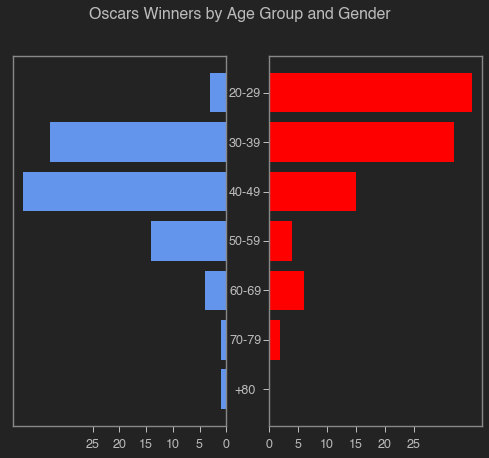

In [96]:
# Creates butterfly chart with differences by age and gender
fig, (ax_left, ax_right) = plt.subplots(ncols=2)
fig.set_size_inches(8.4, 6.8)

ax_left.barh(pos, Male, align='center', facecolor='cornflowerblue')

ax_left.set_yticks([])

ax_left.invert_xaxis()
ax_left.invert_yaxis()

ax_right.barh(pos, Female, align='center', facecolor='red')

ax_right.set_yticks(pos)
ax_right.invert_yaxis()

ax_right.set_yticklabels(winners, ha='center', x=-0.05)

plt.suptitle('Oscars Winners by Age Group and Gender')

#ax_left.set_xlim(20)

ax_left.set_xticks(np.linspace(0,25,num=6)) # Line written with assistance from another student
ax_right.set_xticks(np.linspace(0,25,num=6)) # Line written with assistance from another student

plt.show()

Conclusion: the visualisation reveals that female award winners skew a decade younger compared to male peers. Moreover the median male age for winners is <b>42.5</b> whilst the female median is <b>33</b>.